In [1]:
!pip install pandas scikit-learn matplotlib
!pip install pandas matplotlib seaborn

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
diabetes_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
print(diabetes_data.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [21]:
# Separate features and target
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']

# Identify categorical and numerical columns
categorical_cols = ['gender', 'smoking_history']
numerical_cols = X.columns.difference(categorical_cols)

# Preprocess categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical_cols = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
encoded_categorical_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Preprocess numerical variables
imputer = SimpleImputer(strategy='median')
imputed_numerical_cols = pd.DataFrame(imputer.fit_transform(X[numerical_cols]))
imputed_numerical_cols.columns = numerical_cols

# Combine preprocessed categorical and numerical columns
X_processed = pd.concat([encoded_categorical_cols, imputed_numerical_cols], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


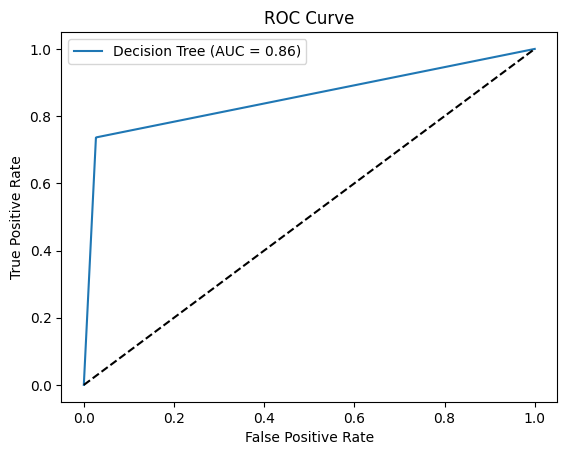

Accuracy: 0.9515
Precision: 0.7045745361484325
Recall: 0.7399630438434402
F1 Score: 0.721835313396149
ROC AUC: 0.8555624234471624


In [31]:
# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Cross-validation predictions
y_pred_cv = cross_val_predict(decision_tree, X_train, y_train, cv=5)

# Calculate metrics
accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv)
recall = recall_score(y_train, y_pred_cv)
f1 = f1_score(y_train, y_pred_cv)
roc_auc = roc_auc_score(y_train, y_pred_cv)

# Fit the model to the full training data and get predictions on the test set
decision_tree.fit(X_train, y_train)
y_pred_test = decision_tree.predict(X_test)
y_pred_proba_test = decision_tree.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)



                     blood_glucose_level       age       bmi  hypertension
blood_glucose_level             1.000000  0.110672  0.091261      0.084429
age                             0.110672  1.000000  0.337396      0.251171
bmi                             0.091261  0.337396  1.000000      0.147666
hypertension                    0.084429  0.251171  0.147666      1.000000


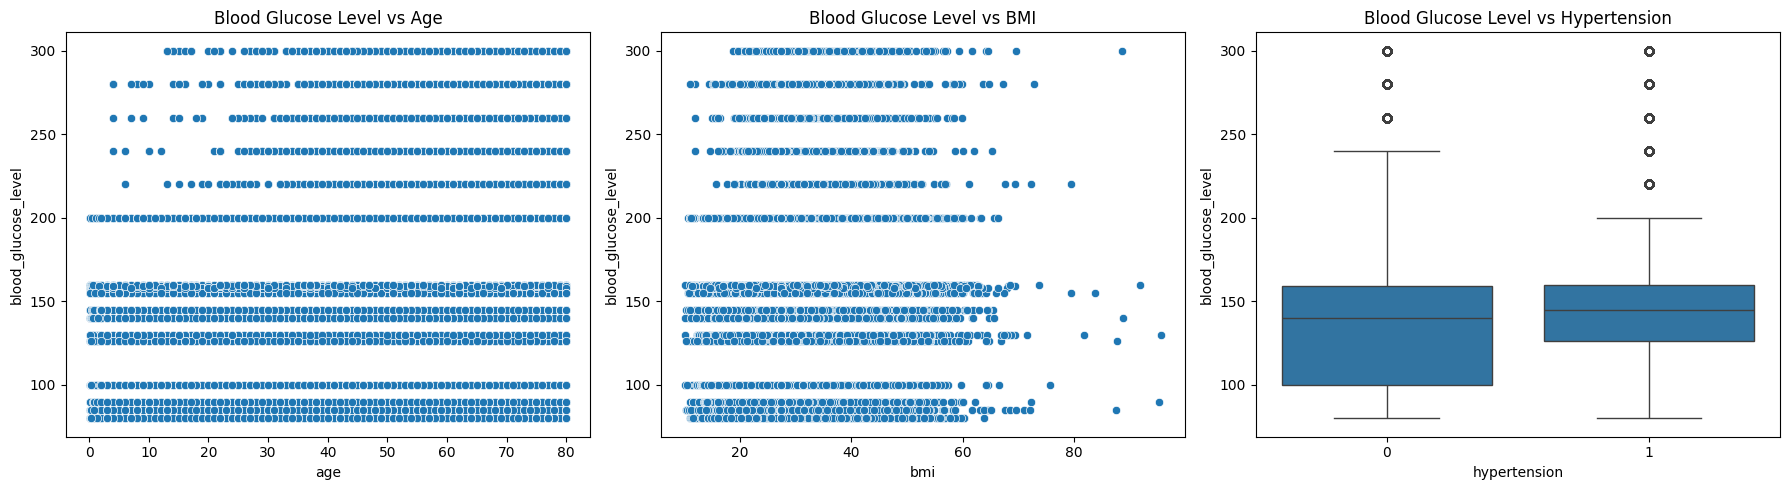

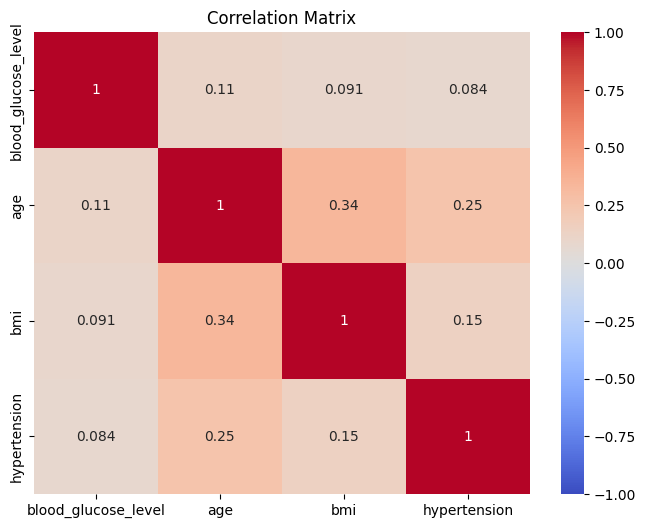